# Gaussian Mixture Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
bigv = pd.read_csv("./data/data.csv")
bigv

EXT  EST  AGR  CSN  OPN
0        4.6  2.4  3.5  3.0  4.5
1        2.0  2.5  4.2  3.7  3.5
2        2.5  2.6  4.0  3.2  4.1
3        2.6  2.9  3.6  2.5  3.9
4        2.9  1.9  4.2  4.4  4.8
...      ...  ...  ...  ...  ...
1015336  3.4  3.3  3.6  2.9  3.3
1015337  3.2  4.4  3.7  2.8  4.5
1015338  3.9  2.9  3.1  2.1  4.8
1015339  2.2  3.5  3.7  3.6  4.1
1015340  3.9  2.9  3.8  2.6  4.7

[1015341 rows x 5 columns]

#### Gaussian Mixture Model considers that clusters are generated following a normal distribution.

The algorithm tries to find the optimal set of parameters so the clusters could be a sample of this distribution.

In [3]:
gmm = GaussianMixture(n_components=5)
gmm.fit(bigv)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [4]:
gmm.predict(bigv)

array([2, 0, 1, ..., 4, 3, 2])

PCA

In [5]:
pca = PCA(n_components=2)
pca.fit(bigv)
res_pca = pca.transform(bigv)
res_pca

array([[-1.68193929, -0.49678282],
       [ 0.30312097,  0.94961915],
       [-0.01223349,  0.47148575],
       ...,
       [-0.70980803, -0.60467532],
       [ 0.74043692,  0.06692537],
       [-0.88241996, -0.66733131]])

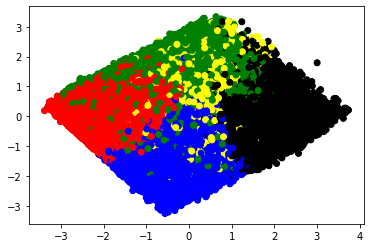

In [6]:
colors = ['yellow', 'blue', 'red', 'black', 'green']

plt.scatter([res_pca[i][0] for i in range(len(res_pca))],
            [res_pca[i][1] for i in range(len(res_pca))],
            color = [colors[i] for i in gmm.predict(bigv)])
plt.show()

In [7]:
bigv["groups"] = gmm.predict(bigv)

In [8]:
bigv.groupby("groups").mean()

EXT       EST       AGR       CSN       OPN
groups                                                  
0       2.743025  2.843685  3.507427  3.266331  3.142992
1       3.377849  3.519699  3.878111  3.185709  3.981262
2       3.736558  2.187209  3.946262  3.458548  4.030396
3       1.975445  3.875772  3.436817  3.094479  3.614198
4       2.717888  2.559693  3.002311  3.248594  4.233548